#### Full Dataset


In [1]:
"""
-----------------------------------------------------------------------------------------------------------
|                                                                                                         |
-----------------------------------------------------------------------------------------------------------

regular splitting

-----------------------------------------------------------------------------------------------------------
|                               70%                                      |     15%          |        15%  |
-----------------------------------------------------------------------------------------------------------

Cross Validation

-----------------------------------------------------------------------------------------------------------
|            |                 |               |                |                       |                 |
----------------------------------------------------------------------------------------------------------

"""

'\n-----------------------------------------------------------------------------------------------------------\n|                                                                                                         |\n-----------------------------------------------------------------------------------------------------------\n\nregular splitting\n\n-----------------------------------------------------------------------------------------------------------\n|                               70%                                      |     15%          |        15%  |\n-----------------------------------------------------------------------------------------------------------\n\nCross Validation\n\n-----------------------------------------------------------------------------------------------------------\n|            |                 |               |                |                       |                 |\n--------------------------------------------------------------------------------

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import(
                                    StratifiedKFold,
                                    cross_validate
)
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            precision_recall_curve,
                            accuracy_score,
                            f1_score,
                            precision_score,
                            recall_score
)
warnings.filterwarnings("ignore")

### 1. Load the Data

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/y_test.npz')['arr_0']

### 2. Configure k-Fold CV

In [4]:
cv = StratifiedKFold(
    n_splits =6,
    random_state=42,
    shuffle=True
)


In [5]:
model_lr  = LogisticRegression(
                            random_state =42,
                            max_iter = 1000,

)
#model_lr.fit(X_train, Y_train)

In [6]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='accuracy',
                            return_train_score=True
)



In [7]:
cv_results

{'fit_time': array([0.01572323, 0.01775384, 0.01363778, 0.01531792, 0.01013732,
        0.01004529]),
 'score_time': array([0.00149226, 0.00110292, 0.00198984, 0.00100422, 0.00090122,
        0.001333  ]),
 'test_score': array([0.73863636, 0.71070076, 0.73188063, 0.7408811 , 0.72666982,
        0.73519659]),
 'train_score': array([0.7301061 , 0.73503221, 0.73003694, 0.72937388, 0.7338259 ,
        0.7294686 ])}

In [8]:
score_arr = ['accuracy', 'precision', 'recall', 'f1']

for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train, 
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=True
    )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    
    print(f"{score} : {test_score_avg}")





accuracy : 0.7306608765891984
precision : 0.728767491464764
recall : 0.7349241825841353
f1 : 0.7318169755021501


In [9]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
)
cv_results

{'fit_time': array([0.01065373, 0.0115366 , 0.01106787, 0.01195598, 0.01196384,
        0.01303649]),
 'score_time': array([0.00205207, 0.00348449, 0.00319195, 0.00181437, 0.00206327,
        0.001724  ]),
 'test_score': array([0.73789174, 0.71247059, 0.73377234, 0.74063537, 0.72795851,
        0.7381733 ])}

In [10]:
best_index = np.argmax(cv_results['test_score'])

fold_indices= list(cv.split(X_train, Y_train))

fold_indices
best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [11]:
seed = 42
np.random.seed(seed)

model_lr  = LogisticRegression(
                               random_state = 42,
                               max_iter = 1000, 
)

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_hat_train

array([0, 0, 0, ..., 1, 1, 0])

In [13]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [14]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6948
Precision: 0.3388
Recall: 0.6543
F1 Score: 0.4465


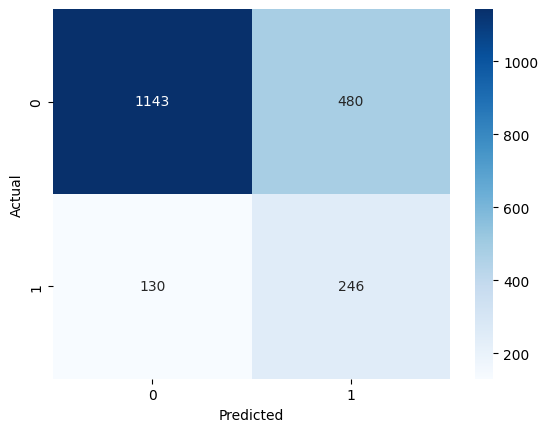

In [15]:
cm = confusion_matrix(Y_test, Y_hat_test)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()